# 1. Create dataset for supermarket perform data clearning and association mining using fpgrowth in rapidminer

## Create Dataset

In [6]:
import pandas as pd
import random
import string
data = {
        'Ragi': list(" ".join(random.choices(['0','1',''])) for i in range(1,50)),
        'Rice': list(" ".join(random.choices(['0','1',''])) for i in range(1,50)),
        'Potato': list(" ".join(random.choices(['0','1',''])) for i in range(1,50)),
        'Tomato': list(" ".join(random.choices(['0','1',''])) for i in range(1,50)),
        'Brinjal': list(" ".join(random.choices(['0','1',''])) for i in range(1,50))
        }

df = pd.DataFrame (data, columns = ['Ragi','Rice','Potato','Tomato','Brinjal'],index=list(range(1,50)))
df.index.name = "tid"

df.to_csv("marketbasket.csv")
df.head()

,Ragi,Rice,Potato,Tomato,Brinjal
tid,,,,,
1,,1,,0,0
2,,0,0,,0
3,0,1,0,1,0
4,0,,0,,
5,0,,,0,1


# 1.b For a set of 20 points write a R or python program to generate 3 clusters using K means

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

[0.47816537 3.67455761]


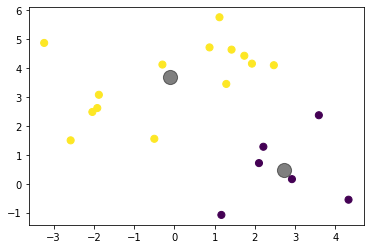

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y_test = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [ ]:
import pandas as pd
import random
import string
data = {
        'Name': list(''.join(random.choices(string.ascii_uppercase, k = 5)) for i in range(1,50)),
        'Gender': list(" ".join(random.choices(['M','F',''])) for i in range(1,50)),
        'State': list(''.join(random.choices(['karnataka','kerala','tamilnadu','andhra',''])) for i in range(1,50)),
        'age': list(random.randint(12,60) for i in range(1,50)),
        'experience': list(random.randint(1,15) for i in range(1,50))
        }

df = pd.DataFrame (data, columns = ['Name','Gender','State','age','experience'],index=list(range(1,50)))
df.index.name = "id"
print (df)
df.to_csv("output.csv")